# Logistic Regression进行二分类

## 1.简单线性二分类 划分平面在几何上是直线

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


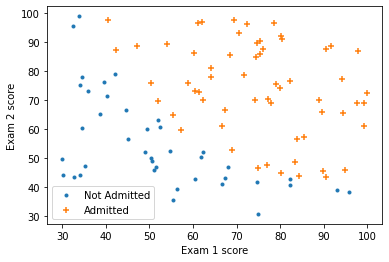

In [20]:
def plotData(filePath,train=False,theta=None):
    data = pd.read_csv(filePath,sep=',',header=None)
    gb = data.groupby(data.iloc[:,-1]) #利用groupby对数据集进行拆分
    for category in list(gb):
        label = category[0]
        if label == 0:
            name = 'Not Admitted'
            shape = '.'
        else:
            name = 'Admitted'
            shape = '+'
        plt.scatter(category[1].iloc[:,0],category[1].iloc[:,1],marker=shape,label=name)
    
    if train == True:
        x = np.linspace(data.iloc[:,0].values.min(),data.iloc[:,0].values.max(),num=10)
        y = -(theta[0]/theta[1])*x - theta[2]/theta[1]
        plt.plot(x,y)

    plt.legend()
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.show()
    return None

filePath = './ex2data1.txt'
plotData(filePath)

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

sigmoid(0)

0.5

In [8]:
data = pd.read_csv('./ex2data1.txt',sep=',',header=None)
X = data.iloc[:,:-1].values
m,n = X.shape
y = data.iloc[:,-1].values.reshape(-1,1)
theta = np.zeros(n+1) #[theta0,theta1,b] 为了后面使用scipy库，使用1维向量
X = np.c_[X,np.ones((m,1))] #扩充偏差b

In [10]:
#损失函数
def costFunction(theta, X, y):
    m = X.shape[0]
    y_pre = sigmoid(np.dot(X,theta))
    temp1 = np.dot(y.T,np.log(y_pre))*(-1/m)
    temp2 = np.dot((1-y).T,np.log(1-y_pre))*(-1/m)
    return temp1+temp2

costFunction(theta, X, y)

array([0.69314718])

In [13]:
#梯度
def gradient(theta,X,y):
    m,n = X.shape
    theta = theta.reshape(-1,1)
    y_pre = sigmoid(np.dot(X,theta))
    grad = np.dot(X.T,(y_pre-y))/m   # n*1的array
    return grad.flatten()
gradient(theta,X,y)

array([-12.00921659, -11.26284221,  -0.1       ])

In [18]:
import scipy.optimize as op
# 采用scipy优化库进行优化求解
def soverOpt(X,y,theta):
    result = op.minimize(fun=costFunction,x0=theta,args=(X,y),method='TNC',jac=gradient)
    print(result)
    return result

result = soverOpt(X,y,theta)
bestTheta = result['x']

    


     fun: array([0.2034977])
     jac: array([1.16974540e-07, 4.86313263e-07, 9.34508114e-09])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([  0.20623159,   0.20147149, -25.16131852])


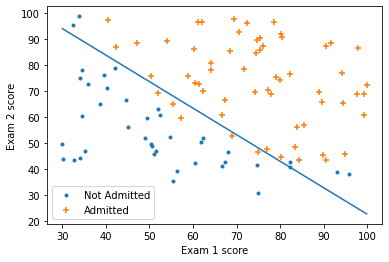

In [21]:
# scipy 优化之后的结果可视化
plotData(filePath,train=True,theta=bestTheta)